In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
commercial_bank = [
    '국민은행', '신한은행', '우리은행', '하나은행', '외환은행'
    # '씨티은행', '스탠다드차타드은행'
] # https://www.bok.or.kr/portal/main/contents.do?menuNo=200580

In [3]:
def info_df(v:pd.DataFrame, date_col:str, columns:list=[]) -> None:
    print()
    print(v.shape)
    print(v.columns)
    print("date:", min(v[date_col]), max(v[date_col]))
    for c in columns:
        print(c, v[c].unique())

# Yield 






* 적격거래(모두 충족시):
  1. 신용등급 AAA인 시중은행 CD(잔존만기 45일 이상 165일 이내) 거래
  2. 건별 거래량 100억원 이상의 거래
  
** 표준만기: 2개월물(45∼79일), 3개월물(80∼100일), 4개월물(101∼135일), 5개월물(136∼165일)

-  제출된 기초수익률의 상·하 극단값 1개씩을 제외한 평균값으로 산출
<!-- https://www.kofiabond.or.kr/websquare/popup.html?w2xPath=/xml/cdplus/BISCdpCalNStepPop.xml&fname=rtnPopup&popupID=cdpCalNStepPop&w2xHome=/xml/&w2xDocumentRoot= -->

In [133]:
seibro = pd.read_csv("seibro\seibro_daily_yield.csv").replace("-", None)
seibro["date"] = pd.to_datetime(seibro["date"], format="%Y%m%d").dt.strftime("%Y-%m-%d")

seibro["10d"] = seibro["10d"].apply(lambda x:  None if x == 0 else x)
seibro[seibro.columns[2:]] = \
    seibro[seibro.columns[2:]].astype(float).round(3)

kofia = pd.read_csv("kofia\yield_daily_CD.csv").replace("-", None)
kofia[kofia.columns[1:]] = \
    kofia[kofia.columns[1:]].astype(float).round(3)
kofia = kofia[kofia["거래일"]<= "2023-10-01"].reset_index(drop=True)


kofia_temp = pd.read_excel("kofia\일자별,기간별.xls").replace("-", None)
kofia_temp[kofia_temp.columns[1:]] = \
    kofia_temp[kofia_temp.columns[1:]].astype(float).round(3)

In [5]:
kofia_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   거래일                          502 non-null    object 
 1   CD수익률                        502 non-null    float64
 2   대표수익률(80~100일)
(거래량가중평균수익률)  248 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.9+ KB


In [6]:
seibro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31120 entries, 0 to 31119
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         31120 non-null  object 
 1   credit_rank  31120 non-null  object 
 2   1d           31120 non-null  float64
 3   7d           17920 non-null  float64
 4   10d          13200 non-null  float64
 5   15d          17920 non-null  float64
 6   1m           31120 non-null  float64
 7   2m           31120 non-null  float64
 8   3m           31120 non-null  float64
 9   4m           31120 non-null  float64
 10  6m           31120 non-null  float64
 11  1y           31120 non-null  float64
 12  2y           31120 non-null  float64
dtypes: float64(11), object(2)
memory usage: 3.1+ MB


In [7]:
info_df(seibro, "date", ["credit_rank"])


(31120, 13)
Index(['date', 'credit_rank', '1d', '7d', '10d', '15d', '1m', '2m', '3m', '4m',
       '6m', '1y', '2y'],
      dtype='object')
date: 2010-01-04 2024-11-29
credit_rank ['AAA' 'AA+' 'AA0' 'AA-' 'A+' 'A0' 'A-' 'BBB']


In [8]:
seibro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31120 entries, 0 to 31119
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         31120 non-null  object 
 1   credit_rank  31120 non-null  object 
 2   1d           31120 non-null  float64
 3   7d           17920 non-null  float64
 4   10d          13200 non-null  float64
 5   15d          17920 non-null  float64
 6   1m           31120 non-null  float64
 7   2m           31120 non-null  float64
 8   3m           31120 non-null  float64
 9   4m           31120 non-null  float64
 10  6m           31120 non-null  float64
 11  1y           31120 non-null  float64
 12  2y           31120 non-null  float64
dtypes: float64(11), object(2)
memory usage: 3.1+ MB


In [9]:
kofia.iloc[3000:3005]

,거래일,대표수익률_시중은행,대표수익률_특수은행,최종호가수익률_오전_시중,최종호가수익률_오전_특수,최종호가수익률_오후_시중,최종호가수익률_오후_특수
3000,2015-01-16,NaN,NaN,2.13000,2.11000,2.13000,2.11000
3001,2015-01-19,NaN,NaN,2.13000,2.11000,2.13000,2.11000
3002,2015-01-20,NaN,NaN,2.13000,2.11000,2.13000,2.11000
3003,2015-01-21,NaN,NaN,2.13000,2.11000,2.13000,2.11000
3004,2015-01-22,NaN,NaN,2.13000,2.11000,2.13000,2.11000


In [10]:
info_df(kofia, "거래일")


(5152, 7)
Index(['거래일', '대표수익률_시중은행', '대표수익률_특수은행', '최종호가수익률_오전_시중', '최종호가수익률_오전_특수',
       '최종호가수익률_오후_시중', '최종호가수익률_오후_특수'],
      dtype='object')
date: 2003-01-02 2023-09-27


In [11]:
kofia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   거래일            5152 non-null   object 
 1   대표수익률_시중은행     988 non-null    float64
 2   대표수익률_특수은행     519 non-null    float64
 3   최종호가수익률_오전_시중  5152 non-null   float64
 4   최종호가수익률_오전_특수  3639 non-null   float64
 5   최종호가수익률_오후_시중  5152 non-null   float64
 6   최종호가수익률_오후_특수  3639 non-null   float64
dtypes: float64(6), object(1)
memory usage: 281.9+ KB


In [12]:
kofia.describe()

,대표수익률_시중은행,대표수익률_특수은행,최종호가수익률_오전_시중,최종호가수익률_오전_특수,최종호가수익률_오후_시중,최종호가수익률_오후_특수
count,988.00000,519.00000,5152.00000,3639.00000,5152.00000,3639.00000
mean,2.27270,2.25674,2.85456,2.15804,2.85477,2.15831
std,0.89255,0.85411,1.34054,0.89557,1.34054,0.89555
min,0.58000,0.59000,0.63000,0.63000,0.63000,0.63000
25%,1.51000,1.53000,1.65000,1.49000,1.65000,1.49000
50%,2.42000,2.35000,2.69000,2.08000,2.69000,2.08000
75%,2.85000,2.82500,3.79250,2.74500,3.79250,2.74000
max,4.05000,3.97000,6.17000,4.07000,6.18000,4.03000


In [13]:
kofia.loc[kofia["대표수익률_시중은행"].notnull()]["거래일"].min()

'2009-02-17'

In [14]:
kofia.loc[kofia["대표수익률_시중은행"].notnull()]["거래일"].max()

'2023-09-27'

In [103]:
kofia["mean"] = (kofia["최종호가수익률_오전_시중"] + kofia["최종호가수익률_오후_시중"])/2
print((kofia["대표수익률_시중은행"] == kofia["mean"]).sum() / 988 * 100)
kofia[(kofia["대표수익률_시중은행"] != kofia["mean"]) & (kofia["대표수익률_시중은행"].notnull())].shape[0] / 988 * 100

35.121457489878544


64.87854251012146

In [104]:
kofia["diff"] = kofia["대표수익률_시중은행"] - kofia["mean"]
kofia["diff"].describe()

count   988.00000
mean      0.00913
std       0.06469
min      -0.35000
25%       0.00000
50%       0.00000
75%       0.01000
max       0.74000
Name: diff, dtype: float64

In [17]:
print(kofia.loc[kofia["diff"] > 0].shape[0] / 988 * 100)
kofia.loc[kofia["diff"] > 0, "diff"].sum() / kofia.loc[kofia["diff"] > 0, "diff"].shape[0]

42.81376518218624


0.0401063829787234

In [18]:
print(kofia.loc[kofia["diff"] < 0].shape[0] / 988 * 100)
kofia.loc[kofia["diff"] < 0, "diff"].sum() / kofia.loc[kofia["diff"] < 0, "diff"].shape[0]

22.06477732793522


-0.03644495412844038

In [105]:
kofia["대표수익률_시중은행"] = kofia["대표수익률_시중은행"].fillna("")
kofia["main_ytm"] = kofia[["대표수익률_시중은행", "mean"]].apply(lambda x: x[0] if isinstance(x[0], float) else x[1], axis=1)

C:\Users\DYK\AppData\Local\Temp\ipykernel_29208\919447086.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kofia["main_ytm"] = kofia[["대표수익률_시중은행", "mean"]].apply(lambda x: x[0] if isinstance(x[0], float) else x[1], axis=1)


### - Coverage

In [20]:
mat = "3m"

m = pd.merge(
    seibro[seibro["credit_rank"]=="AAA"], 
    kofia, 
    left_on="date", right_on="거래일", how="outer", 
    suffixes=("_seibro", "_kofia"), indicator=True,
    validate="1:1"
)
print(m["_merge"].value_counts())
print(m["_merge"].value_counts() / m.shape[0] * 100)
print()
for v in ["both", "left_only", "right_only"]:
    print(m[m["_merge"]==v]["date"].min(), m[m["_merge"]==v]["date"].max())
    print(m[m["_merge"]==v]["거래일"].min(), m[m["_merge"]==v]["거래일"].max())

m = m[m["_merge"]=="both"][["date", mat, "main_ytm"]].rename(
    columns={mat:"seibro", "main_ytm":"kofia"})
m["diff"] = m["kofia"] - m["seibro"]
m["diff"].describe()

_merge
both          3406
right_only    1746
left_only      484
Name: count, dtype: int64
_merge
both         60.43293
right_only   30.97942
left_only     8.58765
Name: count, dtype: float64

2010-01-04 2023-09-27
2010-01-04 2023-09-27
2010-02-15 2024-11-29
nan nan
nan nan
2003-01-02 2009-12-31


count   3406.00000
mean       0.00361
std        0.02466
min       -0.35000
25%        0.00000
50%        0.00000
75%        0.00000
max        0.33000
Name: diff, dtype: float64

In [21]:
m.loc[ m["diff"] > 0, "kofia_larger"] = 1
m.loc[ m["diff"] < 0, "kofia_larger"] = -1
m.loc[ m["diff"] == 0, "kofia_larger"] = 0

print(m["kofia_larger"].value_counts().sort_index() )

m["kofia_larger"].value_counts().sort_index() / m.shape[0] * 100

kofia_larger
-1.00000     336
0.00000     2304
1.00000      766
Name: count, dtype: int64


kofia_larger
-1.00000    9.86494
0.00000    67.64533
1.00000    22.48972
Name: count, dtype: float64

In [22]:
m.loc[m["kofia_larger"] == 1]["diff"].sum() / m.loc[m["kofia_larger"] == 1].shape[0]

0.026370757180156672

In [23]:
m.loc[m["kofia_larger"] == -1]["diff"].sum() / m.loc[m["kofia_larger"] == -1].shape[0]

-0.023497023809523808

# Issuance 

1. Feature
- 공통점: ['발행기관', '발행일', '만기일', '발행금액', '통화']
- 차이점: 
  - Kofia: ['발행금리']
  - Seibro: [
    '표준코드', '종목명', '할인율', 
     '액면금액', '매출금액', '발행형태',
     'VALAT_GRD_CD_NM', '발행은행신용등급', 
     '발행인유형', '지급은행', '등록일자'
    ]

- ex
  - 발행형태 : 전자증권 or 공사채등록
  - 발행인유형 : 시중은행, 지방은행, 특수은행, 외은지점
  - VALAT_GRD_CD_NM, 발행은행신용등급 : 'AA+(A2+)', 'AA-(A2-)', 'AAA0(A1)', None


2. 결론
- CD 데이터는 표준코드가 포함된 발행 및 거래 데이터를 요청하여 받을 수 있다면 좋겠다.

In [63]:
kofia = pd.read_csv("kofia\issue_CD.csv").replace("-", None)
kofia["통화구분"] = kofia["통화구분"].str.strip().replace('원화', 'KRW').str.replace('달러화', 'USD')
print("Kofia CD Issuance")
print(kofia.shape[0], kofia.drop_duplicates().shape[0])
print(kofia["통화구분"].unique())
print(kofia.columns)
print()

seibro = pd.read_csv("seibro\seibro_cd_issue.csv")#.drop(columns=["date", "NUM"])
seibro["기준일자"] = pd.to_datetime(seibro["기준일자"], format="%Y%m%d").dt.strftime("%Y-%m-%d")
print("Seibro CD Issuance")
print(seibro.shape[0], seibro.drop_duplicates().shape[0], seibro["종목번호"].drop_duplicates().shape[0])
print(seibro["발행인유형"].unique())
print(seibro.columns)
print()

seibro_detail = pd.read_csv("seibro\seibro_cd_issue_detail.csv")
seibro_detail.loc[seibro_detail["VALAT_GRD_CD_NM"]=="취소", "VALAT_GRD_CD_NM"] = None
print("Seibro Detail CD Issuance")
print(seibro_detail.shape[0],  seibro_detail.drop_duplicates().shape[0], seibro_detail["종목코드"].drop_duplicates().shape[0])
print(seibro_detail["발행통화"].unique())
print(seibro_detail.columns)
seibro_detail = seibro_detail.sort_values(["발행은행신용등급","VALAT_GRD_CD_NM"]).drop_duplicates(subset=["종목코드"])
seibro_detail = pd.merge(seibro_detail, seibro[["종목번호", "발행인유형"]].drop_duplicates(), left_on="종목코드", right_on="종목번호", how="left")
print(seibro_detail["발행인유형"].value_counts(dropna=False))
print()

Kofia CD Issuance
2855 2842
['KRW' 'USD']
Index(['발행일', '발행기관', '만기일', '만기', '발행금리(%)', '발행금액(억원)', '통화구분'], dtype='object')

Seibro CD Issuance
10024 10024 3593
['특수은행' '지방은행' '외은지점' '시중은행']
Index(['date', '기준일자', 'INPUT_NOS', 'ISSUCO_INDTP_CLSF_NO', '발행인유형',
       'GOODS_CREDITRT_CD', 'GOODS_CREDITRT_CD_NM', '통화', '발행금액', '할인율',
       'SHORTM_FNCEGD_CD', '증권구분', '종목번호', '종목명', '발행일', '만기일',
       'GOODS_DAYOBJ_CD', '일물', 'NUM'],
      dtype='object')

Seibro Detail CD Issuance
8053 8053 3593
['KRW' 'USD' 'CNY']
Index(['발행은행', '발행은행코드', 'ISSUCO_CUSTNO', 'REP_SECN_NM', '종목코드', '종목명', '발행일',
       '만기일', '액면금액', '매출금액', '발행금액', '할인율', '잔존일물', '발행형태', '발행통화',
       '지급은행지점코드', 'PAY_BANK_MOFNO', '발행은행신용등급', '지급은행', 'CREDITRT_DT',
       'VALAT_GRD_CD_NM', '등록일자'],
      dtype='object')
발행인유형
시중은행    1780
지방은행     840
특수은행     708
외은지점     265
Name: count, dtype: int64



In [64]:
seibro_detail["발행형태"].value_counts()

발행형태
전자증권     1931
공사채등록    1662
Name: count, dtype: int64

In [65]:
for dff in [seibro, kofia, seibro_detail]:
    dff["발행일"] = pd.to_datetime(dff["발행일"], format="%Y%m%d").dt.strftime("%Y-%m-%d")
    dff["만기일"] = pd.to_datetime(dff["만기일"], format="%Y%m%d").dt.strftime("%Y-%m-%d")
    for c in dff.columns:
        dff.loc[dff[c].isna(), c] = None

In [66]:
seibro_detail["발행은행신용등급"].unique(), seibro_detail["VALAT_GRD_CD_NM"].unique()

(array(['AA-(A2-)', 'AAA0(A1)', None], dtype=object),
 array([None, 'AA+(A2+)', 'AAA0(A1)'], dtype=object))

In [67]:
for c in seibro_detail.columns:
    if seibro_detail.shape[0] > seibro_detail.drop(columns=[c]).drop_duplicates().shape[0]:
        print(c, seibro_detail.drop(columns=[c]).drop_duplicates().shape[0])

In [68]:
t = seibro_detail["종목코드"].value_counts()
print(t.shape)
temp = pd.merge(t[t>1], seibro_detail, left_on="종목코드", right_on="종목코드", how="inner").sort_values("종목코드")
temp # 등록일자 제일 큰 것으로 선택하는 게 나으려나...

(3593,)


,종목코드,count,발행은행,발행은행코드,ISSUCO_CUSTNO,REP_SECN_NM,종목명,발행일,만기일,액면금액,...,발행통화,지급은행지점코드,PAY_BANK_MOFNO,발행은행신용등급,지급은행,CREDITRT_DT,VALAT_GRD_CD_NM,등록일자,종목번호,발행인유형


In [69]:
# Seibro issuance data에서 발행금액 불일치 1건
for isin in seibro["종목번호"].unique():
    temp = seibro[seibro["종목번호"]==isin]
    if  temp["발행금액"].sum() != seibro_detail[seibro_detail["종목코드"]==isin]["발행금액"].sum():
        print(isin, temp["발행금액"].sum(), seibro_detail[seibro_detail["종목코드"]==isin]["발행금액"].sum())

KRZE02002592 50000000000.0 80000000000.0


Matching Kofia + Seibro

In [70]:
kofia["발행기관"].unique()

array(['농협', '우리은행', '경남은행', '대구은행', '하나은행', '수협', '외환은행', '국민은행',
       '스탠다드차타드은행', '신한은행', '씨티은행', '전북은행', '바클레이즈은행', '중국건설은행', '중국공상은행',
       '산업은행', '광주은행', 'KEB하나은행(구,하나은행)', 'KDB산업은행', '중국은행', '중국농업은행',
       'NH농협은행', 'KEB하나은행(구,외환은행)', '부산은행', '수협은행', '한국산업은행', '중국광대은행',
       '기업은행', 'OCBC은행 서울지점', '하나은행_구외환', '제주은행', '대화은행'], dtype=object)

In [71]:
seibro_detail['종목명_clean'] = seibro_detail['종목명'].str.replace(r"[0-9]|-", "", regex=True).str.strip()
seibro_detail['종목명_clean'].unique()

array(['신한 자금부', '우리 여의도중앙업무팀', '우리 여의도업무팀', '우리 여의도중앙금융센터', '우리 여의도금융센터',
       '우리 여의도중앙기업영업지원팀', '우리 여의도기업영업지원팀', '수협 여의도증권타운지점', '외환 자금부',
       '국민 자금부', '외환 한티역지점', '하나 여의도대투', '하나 하나금융투자센터',
       'KEB하나 기관영업부(금융기관영업팀)', '국민 ALM부', 'KEB하나 기관사업부(금융기관영업팀)',
       'KEB하나 금융기관영업부', 'KEB하나 금융기관영업팀', '하나 금융기관영업유닛', 'KB국민 트레저리부',
       '하나 금융기관영업유닛(기관사업섹션', 'KB국민 자금부', '하나 금융기관영업유닛(기관사업부)',
       '하나 금융기관영업부', '대구 자금부(서울)', 'ING Bank 서울(지)', 'SC제일 자금부',
       '한국스탠다드차타드 자금부', '기업 자금부', '전북 대전지점', '한국씨티 자금부', '부산 금융시장지원부 원화',
       '하나 여의도기업센', '농협은행 영업부', '경남 영업부', '대구 자금증권부', '경남 서울', '대구 증권운용부',
       '경남 서울(지)', '전북 서울(지)', '전북 인천지점', 'Barclays 서울(지)', 'SC 자금부',
       '중국건설은행 서울(지)', '중국공상은행 서울지점', '산업 여의도(지)', '중국은행 서울지점',
       '광주 자금시장부', '중국농업은행주식유한 서울지점', '수협은행 여의도증권타운지점', '전북 여의도지점',
       'SC 자금팀', '농협은행 본점영업부', '중국교통은행 서울(지)', '전북 부평지점',
       '수협은행 여의도증권타운센터', '중국광대은행 서울지점', '전북 서울지점', '전북 부평소매금융센터',
       'OCBC Bank 서울(지)', '부산 금융시장지원부', '제주 자금부', '경남 서울영업부',

In [72]:
kofia["종목명"] = kofia["발행기관"]
for df in [seibro_detail, kofia]:
    df["종목명_mat"] = None

    for key in [ "중국", "하나",
        "신한", "우리", "수협", "외환", "국민", "외환", 
        "대구", "SC", "스탠다드차타드", "기업은행", "전북", "씨티",
        "부산", "산업", "경남", "농협", "아이엠", "기업 자금부"
        "제주", "대화", "광주", "ING", "OCBC", "바클레이즈", "Barclays",
    ]:
        df.loc[df["종목명"].str.contains(key), "종목명_mat"] = key
    print(df["종목명_mat"].value_counts(dropna=False).sort_index())

kofia.loc[kofia["종목명_mat"].str.contains("기업", na=False), "종목명_mat"] = "기업"
seibro_detail.loc[seibro_detail["종목명_mat"].str.contains("기업", na=False), "종목명_mat"] = "기업"

종목명_mat
Barclays     14
ING           1
OCBC          2
SC          156
경남          265
광주           83
국민          432
농협          164
대구          156
대화           21
부산          238
산업          208
수협          306
스탠다드차타드      33
신한          244
씨티           15
외환           19
우리          524
전북           50
중국          227
하나          357
None         78
Name: count, dtype: int64
종목명_mat
OCBC         2
경남         234
광주          68
국민         364
기업은행        13
농협         119
대구         141
대화           4
바클레이즈       14
부산         184
산업         203
수협         293
스탠다드차타드    158
신한         207
씨티          12
외환         113
우리         284
전북          37
중국         179
하나         194
None        32
Name: count, dtype: int64


In [73]:
t = seibro_detail[["발행일", "만기일", "발행통화", "발행금액", "종목명_mat"]].value_counts()
print(t.shape)
print(t[t>1].shape)
temp = pd.merge(t[t>1], seibro_detail, left_on=["발행일", "만기일", "발행통화", "발행금액", "종목명_mat"], right_on=["발행일", "만기일", "발행통화", "발행금액", "종목명_mat"], how="left") #.sort_values(["발행일", "만기일", "발행통화", "발행금액", "종목명_mat"])
# temp.iloc[0]
temp[[
    "발행일", "만기일", "발행통화", "발행금액", "종목명_mat",  "종목코드", "종목명", "발행은행신용등급"
]]

(3500,)
(15,)


,발행일,만기일,발행통화,발행금액,종목명_mat,종목코드,종목명,발행은행신용등급
0,2023-08-16,2024-08-13,KRW,20000000000.00000,우리,KRZE08402D8G,우리 여의도기업영업지원팀 20230816-363-2,AAA0(A1)
1,2023-08-16,2024-08-13,KRW,20000000000.00000,우리,KRZE08405D8G,우리 여의도중앙기업영업지원팀 20230816-363-5,AAA0(A1)
2,2014-11-25,2015-01-26,KRW,70000000000.00000,우리,KRZE020024BR,우리 여의도중앙금융센터 20141125-62-2,AAA0(A1)
3,2014-11-25,2015-01-26,KRW,70000000000.00000,우리,KRZE020034BR,우리 여의도금융센터 20141125-62-3,AAA0(A1)
4,2019-01-04,2019-04-04,KRW,100000000000.00000,우리,KRZE08401914,우리 여의도중앙기업영업지원팀 20190104-90-1,AAA0(A1)
5,2019-01-04,2019-04-04,KRW,100000000000.00000,우리,KRZE08402914,우리 여의도기업영업지원팀 20190104-90-2,AAA0(A1)
6,2023-02-09,2023-03-13,KRW,60000000000.00000,우리,KRZE08402D29,우리 여의도기업영업지원팀 20230209-32-2,AAA0(A1)
7,2023-02-09,2023-03-13,KRW,60000000000.00000,우리,KRZE08403D29,우리 여의도중앙기업영업지원팀 20230209-32-3,AAA0(A1)
8,2022-11-29,2023-02-28,KRW,10000000000.00000,우리,KRZE08401CBW,우리 여의도중앙기업영업지원팀 20221129-91-1,AAA0(A1)
9,2022-11-29,2023-02-28,KRW,10000000000.00000,우리,KRZE08402CBW,우리 여의도기업영업지원팀 20221129-91-2,AAA0(A1)


In [74]:
kofia["발행금액"] = kofia["발행금액(억원)"] * 100000000
merge = pd.merge(
    kofia, 
    # seibro_detail.groupby(["발행일", "만기일", "발행통화", "종목명_mat", "발행인유형"]).agg({
    #     "발행금액": "sum", "종목코드": "count", "액면금액": "sum", "매출금액": "sum", "종목코드": "first",
    # }).reset_index().sort_values("종목코드", ascending=False), 
    seibro_detail[~seibro_detail["종목코드"].isin(temp["종목코드"])],
    left_on=[
        "발행일", "만기일", "통화구분", "발행금액", "종목명_mat"
    ], right_on=[
        "발행일", "만기일", "발행통화", "발행금액", "종목명_mat"
    ],
    how="outer", indicator=True, validate="m:1",
    suffixes=("_kofia", "_seibro")
)
print(merge.columns)
merge["_merge"].value_counts()

Index(['발행일', '발행기관', '만기일', '만기', '발행금리(%)', '발행금액(억원)', '통화구분', '종목명_kofia',
       '종목명_mat', '발행금액', '발행은행', '발행은행코드', 'ISSUCO_CUSTNO', 'REP_SECN_NM',
       '종목코드', '종목명_seibro', '액면금액', '매출금액', '할인율', '잔존일물', '발행형태', '발행통화',
       '지급은행지점코드', 'PAY_BANK_MOFNO', '발행은행신용등급', '지급은행', 'CREDITRT_DT',
       'VALAT_GRD_CD_NM', '등록일자', '종목번호', '발행인유형', '종목명_clean', '_merge'],
      dtype='object')


_merge
both          2309
right_only    1254
left_only      546
Name: count, dtype: int64

In [75]:
merge[merge["_merge"]=="both"][["발행금리(%)", "할인율", "발행금액", "액면금액"]]

,발행금리(%),할인율,발행금액,액면금액
101,2.86000,2.85000,100000000000.00000,10000000000.00000
105,2.85000,2.84000,20000000000.00000,10000000000.00000
106,2.85000,2.84000,40000000000.00000,10000000000.00000
107,2.85000,2.84000,100000000000.00000,10000000000.00000
108,2.85000,2.84000,20000000000.00000,10000000000.00000
...,...,...,...,...
3685,3.82000,3.72000,10000000000.00000,5000000000.00000
3686,3.83000,3.70000,45000000000.00000,5000000000.00000
3687,4.00000,3.86000,175000000000.00000,5000000000.00000
3688,3.82000,3.76000,150000000000.00000,5000000000.00000


(765, 33)


<Axes: title={'center': '[Seibro - Kofia] Interest Rate Difference'}>

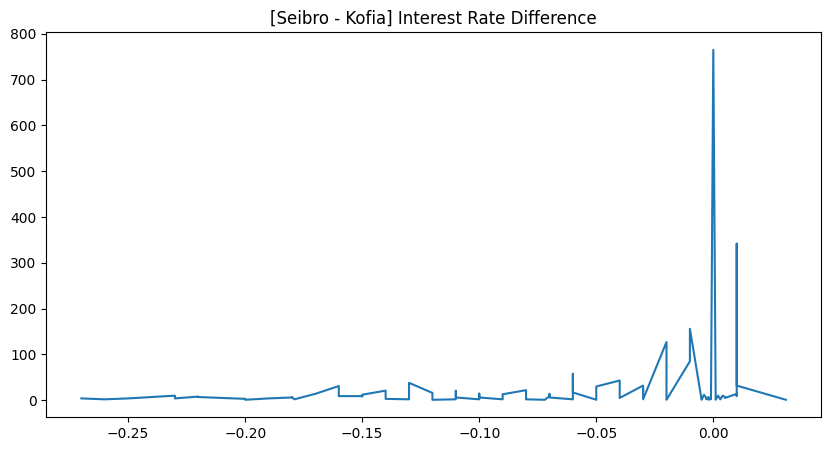

In [ ]:
print(merge[merge["할인율"] == merge["발행금리(%)"]].shape)
(merge["할인율"] - merge["발행금리(%)"]).value_counts().sort_index().plot(
    figsize=(10, 5),
    title="[Seibro - Kofia] Interest Rate Difference"
) # kofia가 더 높은 경우가 많다.

In [132]:
merge["발행일"].min(), merge["발행일"].max()

('2012-01-12', '2024-11-15')

kofia YTM

In [131]:
merge["만기"] = (pd.to_datetime(merge["만기일"]) - pd.to_datetime(merge["발행일"])).dt.days
t = merge[(merge["만기"]>=90) & (merge["만기"]<=93)]["발행일"].value_counts()
print(t[t>1].shape)
temp = pd.merge(
    merge[merge["발행일"].isin(t[t>3].index)].sort_values("발행일"),
    kofia[kofia["거래일"].isin(t[t>3].index)][["거래일", "main_ytm"]].sort_values("거래일"),
    left_on="발행일", right_on="거래일", how="left"
).dropna(subset=["main_ytm"])
temp = temp[(temp["만기"]>=90) & (temp["만기"]<=93)]
temp[["발행일", "만기일", "만기", "발행통화", "발행금액", "종목명_mat", "발행금리(%)", "할인율", "발행금액", "액면금액", "main_ytm"]]

(195,)


,발행일,만기일,만기,발행통화,발행금액,종목명_mat,발행금리(%),할인율,발행금액,액면금액,main_ytm
1,2012-11-06,2013-02-05,91,KRW,30000000000.00000,우리,NaN,2.84000,30000000000.00000,10000000000.00000,2.86000
2,2012-11-06,2013-02-05,91,KRW,120000000000.00000,우리,NaN,2.84000,120000000000.00000,10000000000.00000,2.86000
3,2012-11-06,2013-02-05,91,NaN,150000000000.00000,우리,2.85000,NaN,150000000000.00000,NaN,2.86000
4,2012-11-06,2013-02-06,92,KRW,40000000000.00000,대구,2.85000,2.84000,40000000000.00000,10000000000.00000,2.86000
5,2014-02-06,2014-05-08,91,KRW,90000000000.00000,우리,NaN,2.64000,90000000000.00000,10000000000.00000,2.65000
...,...,...,...,...,...,...,...,...,...,...,...
138,2023-09-22,2023-12-22,91,NaN,10000000000.00000,수협,3.82000,NaN,10000000000.00000,NaN,3.85000
139,2023-09-22,2023-12-22,91,NaN,5000000000.00000,수협,3.82000,NaN,5000000000.00000,NaN,3.85000
140,2023-09-22,2023-12-22,91,NaN,5000000000.00000,수협,3.82000,NaN,5000000000.00000,NaN,3.85000
141,2023-09-22,2023-12-22,91,NaN,10000000000.00000,수협,3.82000,NaN,10000000000.00000,NaN,3.85000


In [ ]:
temp["발행일"].value_counts()

발행일
2023-07-24    8
2014-04-08    7
2023-07-13    6
2023-06-23    6
2023-06-05    6
2023-04-21    6
2023-09-22    5
2014-04-18    5
2022-11-25    4
2023-09-14    4
2023-08-08    4
2012-11-06    4
2021-12-15    4
2014-02-06    4
2019-03-27    4
2018-04-16    4
2017-01-24    4
2016-01-26    4
2015-05-26    4
2015-01-06    4
2019-05-03    4
Name: count, dtype: int64

In [125]:
temp[temp["발행일"]=="2023-07-24"][[
    "발행일", "만기일", "만기", "발행통화", "발행금액", "종목명_mat", "발행금리(%)", "할인율", "발행금액", "액면금액", "main_ytm"
]]

,발행일,만기일,만기,발행통화,발행금액,종목명_mat,발행금리(%),할인율,발행금액,액면금액,main_ytm
122,2023-07-24,2023-10-24,92,KRW,290000000000.00000,수협,NaN,3.73000,290000000000.00000,5000000000.00000,3.75000
123,2023-07-24,2023-10-24,92,NaN,150000000000.00000,수협,3.75000,NaN,150000000000.00000,NaN,3.75000
124,2023-07-24,2023-10-24,92,NaN,30000000000.00000,수협,3.75000,NaN,30000000000.00000,NaN,3.75000
125,2023-07-24,2023-10-24,92,NaN,50000000000.00000,수협,3.75000,NaN,50000000000.00000,NaN,3.75000
126,2023-07-24,2023-10-24,92,NaN,30000000000.00000,수협,3.75000,NaN,30000000000.00000,NaN,3.75000
127,2023-07-24,2023-10-24,92,NaN,20000000000.00000,수협,3.75000,NaN,20000000000.00000,NaN,3.75000
128,2023-07-24,2023-10-24,92,NaN,10000000000.00000,수협,3.75000,NaN,10000000000.00000,NaN,3.75000
129,2023-07-24,2023-10-24,92,KRW,140000000000.00000,경남,3.75000,3.73000,140000000000.00000,5000000000.00000,3.75000


In [126]:
temp[temp["발행일"]=="2014-04-08"][[
    "발행일", "만기일", "만기", "발행통화", "발행금액", "종목명_mat", "발행금리(%)", "할인율", "발행금액", "액면금액", "main_ytm"
]]

,발행일,만기일,만기,발행통화,발행금액,종목명_mat,발행금리(%),할인율,발행금액,액면금액,main_ytm
10,2014-04-08,2014-07-10,93,KRW,70000000000.00000,수협,2.65000,2.64000,70000000000.00000,10000000000.00000,2.66000
11,2014-04-08,2014-07-08,91,KRW,200000000000.00000,국민,2.65000,2.64000,200000000000.00000,10000000000.00000,2.66000
12,2014-04-08,2014-07-08,91,KRW,160000000000.00000,하나,2.65000,2.64000,160000000000.00000,10000000000.00000,2.66000
13,2014-04-08,2014-07-08,91,KRW,100000000000.00000,농협,2.65000,2.64000,100000000000.00000,10000000000.00000,2.66000
14,2014-04-08,2014-07-08,91,NaN,70000000000.00000,스탠다드차타드,2.65000,NaN,70000000000.00000,NaN,2.66000
15,2014-04-08,2014-07-08,91,KRW,220000000000.00000,외환,2.65000,2.64000,220000000000.00000,10000000000.00000,2.66000
20,2014-04-08,2014-07-08,91,KRW,70000000000.00000,SC,NaN,2.64000,70000000000.00000,10000000000.00000,2.66000


In [127]:
temp[temp["발행일"]=="2023-04-21"][[
    "발행일", "만기일", "만기", "발행통화", "발행금액", "종목명_mat", "발행금리(%)", "할인율", "발행금액", "액면금액", "main_ytm"
]]

,발행일,만기일,만기,발행통화,발행금액,종목명_mat,발행금리(%),할인율,발행금액,액면금액,main_ytm
81,2023-04-21,2023-07-21,91,KRW,50000000000.00000,경남,3.53000,3.51000,50000000000.00000,5000000000.00000,3.50000
82,2023-04-21,2023-07-21,91,KRW,60000000000.00000,대구,3.50000,3.48000,60000000000.00000,10000000000.00000,3.50000
83,2023-04-21,2023-07-21,91,KRW,80000000000.00000,우리,NaN,3.47000,80000000000.00000,10000000000.00000,3.50000
84,2023-04-21,2023-07-21,91,KRW,140000000000.00000,우리,NaN,3.47000,140000000000.00000,10000000000.00000,3.50000
85,2023-04-21,2023-07-21,91,KRW,150000000000.00000,하나,3.49000,3.47000,150000000000.00000,10000000000.00000,3.50000
86,2023-04-21,2023-07-21,91,NaN,220000000000.00000,우리,3.49000,NaN,220000000000.00000,NaN,3.50000


In [128]:
temp[temp["발행일"]=="2018-04-16"][[
    "발행일", "만기일", "만기", "발행통화", "발행금액", "종목명_mat", "발행금리(%)", "할인율", "발행금액", "액면금액", "main_ytm"
]]

,발행일,만기일,만기,발행통화,발행금액,종목명_mat,발행금리(%),할인율,발행금액,액면금액,main_ytm
47,2018-04-16,2018-07-16,91,KRW,50000000000.00000,우리,NaN,1.65000,50000000000.00000,10000000000.00000,1.66000
48,2018-04-16,2018-07-16,91,KRW,100000000000.00000,수협,1.65000,1.65000,100000000000.00000,10000000000.00000,1.66000
49,2018-04-16,2018-07-16,91,KRW,150000000000.00000,우리,NaN,1.65000,150000000000.00000,10000000000.00000,1.66000
50,2018-04-16,2018-07-16,91,NaN,200000000000.00000,우리,1.65000,NaN,200000000000.00000,NaN,1.66000


seibro YTM

In [135]:
seibro = seibro[seibro["credit_rank"]=="AAA"]
seibro

,date,credit_rank,1d,7d,10d,15d,1m,2m,3m,4m,6m,1y,2y
0,2010-01-04,AAA,2.18000,NaN,2.35000,NaN,2.62000,2.80000,2.88000,3.05000,3.48000,4.24000,4.85000
8,2010-01-05,AAA,2.18000,NaN,2.35000,NaN,2.62000,2.80000,2.88000,3.05000,3.48000,4.25000,4.85000
16,2010-01-06,AAA,2.18000,NaN,2.35000,NaN,2.62000,2.80000,2.88000,3.05000,3.48000,4.25000,4.85000
24,2010-01-07,AAA,2.18000,NaN,2.35000,NaN,2.62000,2.78000,2.88000,3.05000,3.48000,4.25000,4.85000
32,2010-01-08,AAA,2.18000,NaN,2.35000,NaN,2.62000,2.78000,2.88000,3.05000,3.48000,4.25000,4.85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31080,2024-11-25,AAA,3.28000,3.31000,NaN,3.33000,3.34000,3.38000,3.43000,3.40000,3.31000,3.26000,3.44000
31088,2024-11-26,AAA,3.28000,3.31000,NaN,3.33000,3.34000,3.38000,3.43000,3.40000,3.31000,3.26000,3.44000
31096,2024-11-27,AAA,3.28000,3.31000,NaN,3.33000,3.34000,3.38000,3.43000,3.40000,3.31000,3.26000,3.44000
31104,2024-11-28,AAA,3.28000,3.31000,NaN,3.33000,3.34000,3.38000,3.43000,3.40000,3.31000,3.26000,3.44000


In [136]:
merge["만기"] = (pd.to_datetime(merge["만기일"]) - pd.to_datetime(merge["발행일"])).dt.days
t = merge[(merge["만기"]>=90) & (merge["만기"]<=93)]["발행일"].value_counts()
print(t[t>1].shape)
temp = pd.merge(
    merge[merge["발행일"].isin(t[t>3].index)].sort_values("발행일"),
    seibro[seibro["date"].isin(t[t>3].index)][["date", "3m"]].sort_values("date"),
    left_on="발행일", right_on="date", how="left"
).dropna(subset=["3m"])
temp = temp[(temp["만기"]>=90) & (temp["만기"]<=93)]
temp[["발행일", "만기일", "만기", "발행통화", "발행금액", "종목명_mat", "발행금리(%)", "할인율", "발행금액", "액면금액", "3m"]]

(195,)


,발행일,만기일,만기,발행통화,발행금액,종목명_mat,발행금리(%),할인율,발행금액,액면금액,3m
1,2012-11-06,2013-02-05,91,KRW,30000000000.00000,우리,NaN,2.84000,30000000000.00000,10000000000.00000,2.85000
2,2012-11-06,2013-02-05,91,KRW,120000000000.00000,우리,NaN,2.84000,120000000000.00000,10000000000.00000,2.85000
3,2012-11-06,2013-02-05,91,NaN,150000000000.00000,우리,2.85000,NaN,150000000000.00000,NaN,2.85000
4,2012-11-06,2013-02-06,92,KRW,40000000000.00000,대구,2.85000,2.84000,40000000000.00000,10000000000.00000,2.85000
5,2014-02-06,2014-05-08,91,KRW,90000000000.00000,우리,NaN,2.64000,90000000000.00000,10000000000.00000,2.65000
...,...,...,...,...,...,...,...,...,...,...,...
142,2023-09-22,2023-12-22,91,KRW,30000000000.00000,수협,NaN,3.79000,30000000000.00000,5000000000.00000,3.83000
148,2023-10-12,2024-01-12,92,NaN,45000000000.00000,우리,3.82000,NaN,45000000000.00000,NaN,3.82000
149,2023-10-12,2024-01-12,92,KRW,35000000000.00000,우리,NaN,3.79000,35000000000.00000,5000000000.00000,3.82000
151,2023-10-12,2024-01-12,92,KRW,10000000000.00000,부산,3.82000,3.79000,10000000000.00000,5000000000.00000,3.82000


In [137]:
temp["발행일"].value_counts()

발행일
2023-07-24    8
2014-04-08    7
2023-07-13    6
2023-06-23    6
2023-06-05    6
2023-04-21    6
2014-04-18    5
2023-09-22    5
2012-11-06    4
2022-11-25    4
2023-09-14    4
2023-08-08    4
2021-12-15    4
2014-02-06    4
2019-05-03    4
2019-03-27    4
2018-04-16    4
2017-01-24    4
2016-01-26    4
2015-05-26    4
2015-01-06    4
2023-10-12    4
Name: count, dtype: int64

In [139]:
temp[temp["발행일"]=="2023-07-24"][[
    "발행일", "만기일", "만기", "발행통화", "발행금액", "종목명_mat", "발행금리(%)", "할인율", "발행금액", "액면금액", "3m"
]]

,발행일,만기일,만기,발행통화,발행금액,종목명_mat,발행금리(%),할인율,발행금액,액면금액,3m
122,2023-07-24,2023-10-24,92,KRW,290000000000.00000,수협,NaN,3.73000,290000000000.00000,5000000000.00000,3.75000
123,2023-07-24,2023-10-24,92,NaN,150000000000.00000,수협,3.75000,NaN,150000000000.00000,NaN,3.75000
124,2023-07-24,2023-10-24,92,NaN,30000000000.00000,수협,3.75000,NaN,30000000000.00000,NaN,3.75000
125,2023-07-24,2023-10-24,92,NaN,50000000000.00000,수협,3.75000,NaN,50000000000.00000,NaN,3.75000
126,2023-07-24,2023-10-24,92,NaN,30000000000.00000,수협,3.75000,NaN,30000000000.00000,NaN,3.75000
127,2023-07-24,2023-10-24,92,NaN,20000000000.00000,수협,3.75000,NaN,20000000000.00000,NaN,3.75000
128,2023-07-24,2023-10-24,92,NaN,10000000000.00000,수협,3.75000,NaN,10000000000.00000,NaN,3.75000
129,2023-07-24,2023-10-24,92,KRW,140000000000.00000,경남,3.75000,3.73000,140000000000.00000,5000000000.00000,3.75000


In [140]:
temp[temp["발행일"]=="2014-04-18"][[
    "발행일", "만기일", "만기", "발행통화", "발행금액", "종목명_mat", "발행금리(%)", "할인율", "발행금액", "액면금액", "3m"
]]

,발행일,만기일,만기,발행통화,발행금액,종목명_mat,발행금리(%),할인율,발행금액,액면금액,3m
21,2014-04-18,2014-07-18,91,KRW,40000000000.00000,우리,NaN,2.64000,40000000000.00000,10000000000.00000,2.65000
22,2014-04-18,2014-07-18,91,KRW,100000000000.00000,신한,2.65000,2.64000,100000000000.00000,10000000000.00000,2.65000
23,2014-04-18,2014-07-18,91,KRW,110000000000.00000,우리,NaN,2.64000,110000000000.00000,10000000000.00000,2.65000
24,2014-04-18,2014-07-18,91,NaN,150000000000.00000,우리,2.65000,NaN,150000000000.00000,NaN,2.65000
25,2014-04-18,2014-07-18,91,KRW,200000000000.00000,농협,2.65000,2.64000,200000000000.00000,10000000000.00000,2.65000


left merge

In [37]:
left_kofia = merge[merge["_merge"]=="left_only"]
t = left_kofia[["발행일", "만기일", "종목명_mat"]].value_counts()
left_kofia = pd.merge(t[t==1], left_kofia, left_on=["발행일", "만기일", "종목명_mat"], right_on=["발행일", "만기일", "종목명_mat"], how="left")
print(left_kofia.shape, merge[merge["_merge"]=="left_only"].shape, left_kofia[[ "발행일", "만기일", "종목명_mat"]].value_counts().shape)

left_seibro = merge[merge["_merge"]=="right_only"]
t = left_seibro[["발행일", "만기일", "종목명_mat"]].value_counts()
left_seibro = pd.merge(t[t==1], left_seibro, left_on=["발행일", "만기일", "종목명_mat"], right_on=["발행일", "만기일", "종목명_mat"], how="left")
print(left_seibro.shape, merge[merge["_merge"]=="right_only"].shape, left_seibro[[ "발행일", "만기일", "종목명_mat"]].value_counts().shape)

left_merge = pd.merge(
    left_kofia.drop(columns=['_merge']), left_seibro.drop(columns=['_merge']),
    left_on=[
        "발행일", "만기일", "종목명_mat"
    ], right_on=[
        "발행일", "만기일", "종목명_mat"
    ],
    how="outer", indicator=True, validate="1:1",
    suffixes=("_kofia", "_seibro")
).sort_values(["_merge", "발행일"])
left_merge["_merge"].value_counts()

(485, 34) (546, 33) (485,)
(842, 34) (1254, 33) (842,)


_merge
right_only    817
left_only     460
both           25
Name: count, dtype: int64

In [38]:
left_merge.loc[left_merge["_merge"]=="left_only", [ "발행일", "만기일", "종목명_mat", "발행금액_kofia"]]

,발행일,만기일,종목명_mat,발행금액_kofia
97,2012-10-24,2013-02-25,우리,100000000000.00000
98,2012-11-06,2013-02-05,우리,150000000000.00000
99,2012-11-15,2013-02-14,우리,100000000000.00000
101,2013-01-02,2014-04-03,경남,40000000000.00000
103,2013-01-14,2013-04-16,신한,100000000000.00000
...,...,...,...,...
929,2023-12-01,2024-06-03,우리,130000000000.00000
930,2023-12-04,2024-05-03,기업,30000000000.00000
931,2023-12-05,2024-09-05,우리,120000000000.00000
932,2023-12-14,2024-06-14,우리,105000000000.00000


In [39]:
left_merge.loc[(left_merge["_merge"]=="right_only") & (left_merge['발행일'] >= "2012-10-26") , ["발행일", "만기일", "종목명_mat", "발행금액_seibro"]]

,발행일,만기일,종목명_mat,발행금액_seibro
100,2013-01-02,2013-04-03,경남,40000000000.00000
102,2013-01-14,2013-04-15,신한,100000000000.00000
104,2013-01-18,2013-04-19,스탠다드차타드,206799454997.00000
109,2013-04-19,2013-07-19,스탠다드차타드,208091147213.00000
113,2013-07-03,2013-09-02,Barclays,10000000000.00000
...,...,...,...,...
1297,2024-11-14,2025-05-13,하나,30000000000.00000
1298,2024-11-14,2025-05-14,광주,20000000000.00000
1299,2024-11-15,2025-02-11,전북,60000000000.00000
1300,2024-11-15,2025-02-21,하나,125000000000.00000


# Transaction


1. Feature
- 공통점: ['거래일', '발행기관', '발행일', '만기일', '수익률', '통화']
- 차이점: 
  - Kofia: ['거래구분', '정정여부', '거래대금(억원)', '거래량(억원)', ]
  - Seibro: ['표준코드', '종목명', '매수유형', '매도유형', '매매금액']

- ex
  - 거래구분 : 매수 or 매도
  - 매수유형, 매도유형 : 국가지자체, 국내은행, 보험, 연기금, 외국은행, 증권사 ...

In [40]:
kofia = pd.read_csv("kofia\\trans_detail_CD.csv").replace("-", None)
kofia["거래일자"] = pd.to_datetime(kofia["거래일자"], format="%Y%m%d").dt.strftime("%Y-%m-%d")
# kofia["발행일"] = pd.to_datetime(kofia["발행일"].astype(str), format="%Y%m%d").dt.strftime("%Y-%m-%d")
kofia["만기일"] = pd.to_datetime(kofia["만기일"], format="%Y%m%d").dt.strftime("%Y-%m-%d")
print(kofia.shape[0], kofia.drop_duplicates().shape[0])
print(kofia.columns)
print()

seibro = pd.read_csv("seibro\seibro_cd_trans.csv").drop(columns=["date", "NUM"])
seibro["기준일자"] = pd.to_datetime(seibro["기준일자"], format="%Y%m%d").dt.strftime("%Y-%m-%d")
seibro["발행일"] = pd.to_datetime(seibro["발행일"], format="%Y%m%d").dt.strftime("%Y-%m-%d")
seibro["만기일"] = pd.to_datetime(seibro["만기일"], format="%Y%m%d").dt.strftime("%Y-%m-%d")
print(
    seibro["매도유형"].value_counts().sort_index().to_frame().T, 
    seibro["매수유형"].value_counts().sort_index().to_frame().T
)

seibro_detail = pd.read_csv("seibro\seibro_cd_issue_detail.csv").drop_duplicates(subset=["종목코드"])
seibro = pd.merge(seibro, seibro_detail, 
left_on="종목번호", right_on="종목코드", how="left", validate="m:1")



print(seibro.shape[0], seibro.drop_duplicates().shape[0])
print(seibro.columns)
print()



70952 67496
Index(['거래일자', '시간', '발행기관', '발행일', '만기일', '잔존기간', '수익률(%)', '거래량(억원)',
       '거래대금(억원)', '통화구분', '거래구분', '정정여부'],
      dtype='object')

매도유형   국가·지자체  국내은행  기타 금융업  보험  여신 금융업  연기금·공제  외국은행  은행(신탁)    증권사  증권사(신탁)  \
count     372    39    1043  69       2     623    33       6  49027     1124   

매도유형    집합투자  
count  12808   매수유형   국가·지자체  국내은행  기타 금융업  기타(신탁)   보험  비거주자  여신 금융업  연기금·공제  외국은행  은행(신탁)  \
count    1187   292     992     166  211    61     192    2044   306      74   

매수유형     증권사  증권사(신탁)   집합투자  
count  20280     1978  37363  
65146 36392
Index(['기준일자', 'SELLER_INDTP_TPCD', '매도유형', 'BUYER_INDTP_TPCD', '매수유형', '통화',
       'SETL_AMT', '금리', 'SHORTM_FNCEGD_CD', '증권구분', '종목번호', '종목명_x', '발행일_x',
       '만기일_x', 'GOODS_LEF_XPIR_TPCD', '잔존만기', '발행은행', '발행은행코드',
       'ISSUCO_CUSTNO', 'REP_SECN_NM', '종목코드', '종목명_y', '발행일_y', '만기일_y',
       '액면금액', '매출금액', '발행금액', '할인율', '잔존일물', '발행형태', '발행통화', '지급은행지점코드',
       'PAY_BANK_MOFNO', '발행은행신용등급', '지급은행', 'CREDI

In [41]:
dkofia = kofia[(kofia["정정여부"].isna())]

merge = pd.merge(
    dkofia.groupby("거래일자").agg({
        "거래대금(억원)": "sum",
    }),
    seibro.groupby("기준일자").agg({
        "SETL_AMT": "sum",
    }),
    left_index=True, right_index=True, how="inner",
)

merge["거래대금(억원)"] = merge["거래대금(억원)"] * 100000000
merge["SETL_AMT"] = merge["SETL_AMT"] * 2
merge["diff"] = merge["거래대금(억원)"] - merge["SETL_AMT"]
(merge.describe() / 100000000).drop(index="count")

,거래대금(억원),SETL_AMT,diff
mean,38467833.67696,4547.20524,38463286.47172
std,1174171822.23054,4236.84677,1174171807.99186
min,26.00000,99.41874,-9985.89657
25%,996.00000,1595.03977,-1491.68366
50%,2376.00000,3381.65346,-699.70534
75%,4867.50000,6081.63800,-199.58503
max,39875630415.00000,36051.35282,39875624041.12575


In [42]:
dkofia = kofia[(kofia["정정여부"].isna()) ]
tk = dkofia["거래일자"].value_counts().sort_index()
sseibro = pd.concat([seibro, seibro[
    ((seibro["매수유형"] == "증권사") & (seibro["매도유형"] == "증권사")) \
        | ((seibro["매수유형"] == "증권사") & (seibro["매도유형"] == "증권사(신탁)")) \
        | ((seibro["매수유형"] == "증권사(신탁)") & (seibro["매도유형"] == "증권사")) \
        | ((seibro["매수유형"] == "증권사") & (seibro["매도유형"] == "외국은행")) \
]])
ts = sseibro["기준일자"].value_counts().sort_index()

tm = pd.merge(tk, ts, left_index=True, right_index=True, how="inner",
    suffixes=("_kofia", "_seibro"))   
print(tm.columns)
print(tm.index.min(), tm.index.max())

Index(['count_kofia', 'count_seibro'], dtype='object')
2012-01-02 2023-12-29


In [43]:
tm["kofia_larger"] = (tm["count_kofia"] > tm["count_seibro"]).apply(
    lambda x: 1 if x else -1
)
tm.loc[(tm["count_kofia"] == tm["count_seibro"]), "kofia_larger"] = 0
tm["diff"] = tm["count_kofia"] - tm["count_seibro"]

In [44]:
print((tm["count_kofia"] == tm["count_seibro"]).sum(), (tm["count_kofia"] != tm["count_seibro"]).sum())
print(
    (tm["count_kofia"] == tm["count_seibro"]).sum() / tm.shape[0] * 100, 
    (tm["count_kofia"] != tm["count_seibro"]).sum() / tm.shape[0] * 100, 
)

print((tm["count_kofia"] - tm["count_seibro"]).sum())
print((tm["count_kofia"] > tm["count_seibro"]).sum())

print(tm.shape)
tm.tail(10)

604 1987
23.311462755692784 76.68853724430721
2934
1228
(2591, 4)


,count_kofia,count_seibro,kofia_larger,diff
2023-12-15,54,47,1,7
2023-12-18,33,27,1,6
2023-12-19,33,28,1,5
2023-12-20,27,25,1,2
2023-12-21,70,61,1,9
2023-12-22,32,30,1,2
2023-12-26,76,68,1,8
2023-12-27,82,65,1,17
2023-12-28,7,7,0,0
2023-12-29,74,41,1,33


In [45]:
tm["kofia_larger"].value_counts() / tm.shape[0] * 100

kofia_larger
 1   47.39483
-1   29.29371
 0   23.31146
Name: count, dtype: float64

In [46]:
tm.loc[tm["kofia_larger"] == 1]["diff"].sum() / tm.loc[tm["kofia_larger"] == 1].shape[0]

5.337947882736156

In [47]:
tm.loc[tm["kofia_larger"] == -1]["diff"].sum() / tm.loc[tm["kofia_larger"] == -1].shape[0]

-4.770750988142293

In [48]:
cb_kofia = kofia[kofia["발행기관"].str.contains(r"(국민|신한|우리|하나|외환)", regex=True, na=False)]
cb_seibro = seibro[
    (seibro["발행은행"].str.contains(r"(국민|신한|우리|하나|외환)", regex=True, na=False))  ]
    # & (seibro["VALAT_GRD_CD_NM"] == "AAA")]

C:\Users\DYK\AppData\Local\Temp\ipykernel_29208\3991286019.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cb_kofia = kofia[kofia["발행기관"].str.contains(r"(국민|신한|우리|하나|외환)", regex=True, na=False)]
C:\Users\DYK\AppData\Local\Temp\ipykernel_29208\3991286019.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (seibro["발행은행"].str.contains(r"(국민|신한|우리|하나|외환)", regex=True, na=False))  ]


In [49]:
cb_seibro["발행은행신용등급"].value_counts(dropna=False)

발행은행신용등급
AAA0(A1)    29934
AA-(A2-)     6530
NaN           905
Name: count, dtype: int64

In [50]:
cb_seibro[cb_seibro["잔존일물"]<0].shape[0] / cb_seibro.shape[0] * 100  

93.20559822312612

In [51]:
cb_seibro[cb_seibro["발행은행신용등급"]!="AAA0(A1)"][[
    "발행은행", "발행은행신용등급", "잔존일물"
]]

,발행은행,발행은행신용등급,잔존일물
971,하나은행,NaN,-4424.00000
972,하나은행,NaN,-4424.00000
973,하나은행,NaN,-4285.00000
974,하나은행,NaN,-4285.00000
975,하나은행,NaN,-4424.00000
...,...,...,...
64846,신한은행,AA-(A2-),77.00000
64907,신한은행,AA-(A2-),5.00000
64908,신한은행,AA-(A2-),5.00000
64919,신한은행,AA-(A2-),5.00000


In [52]:
dkofia = cb_kofia[(cb_kofia["정정여부"].isna()) ]
tk = dkofia["거래일자"].value_counts().sort_index()
sseibro = pd.concat([cb_seibro, cb_seibro[
    ((cb_seibro["매수유형"] == "증권사") & (cb_seibro["매도유형"] == "증권사")) \
        | ((cb_seibro["매수유형"] == "증권사") & (cb_seibro["매도유형"] == "증권사(신탁)")) \
        | ((cb_seibro["매수유형"] == "증권사(신탁)") & (cb_seibro["매도유형"] == "증권사")) \
        | ((cb_seibro["매수유형"] == "증권사") & (cb_seibro["매도유형"] == "외국은행")) \
]])
ts = sseibro["기준일자"].value_counts().sort_index()

tm = pd.merge(tk, ts, left_index=True, right_index=True, how="inner",
    suffixes=("_kofia", "_seibro"))   
print(tm.columns)
print(tm.index.min(), tm.index.max())

Index(['count_kofia', 'count_seibro'], dtype='object')
2012-05-24 2023-12-29


In [53]:
tm["kofia_larger"] = (tm["count_kofia"] > tm["count_seibro"]).apply(
    lambda x: 1 if x else -1
)
tm.loc[(tm["count_kofia"] == tm["count_seibro"]), "kofia_larger"] = 0
tm["diff"] = tm["count_kofia"] - tm["count_seibro"]
print((tm["count_kofia"] == tm["count_seibro"]).sum(), (tm["count_kofia"] != tm["count_seibro"]).sum())


685 1289


In [54]:
tm.loc[
    (tm["count_kofia"] - tm["count_seibro"] <= 2) \
    & (tm["count_kofia"] - tm["count_seibro"] >= -2)
    , "kofia_larger"] = 0

print(
    (tm["kofia_larger"] == 0).sum(),
    (tm["kofia_larger"] != 0).sum() 
)

1233 741


In [55]:
tm["kofia_larger"].value_counts()

kofia_larger
 0    1233
 1     449
-1     292
Name: count, dtype: int64

In [56]:
tm["kofia_larger"].value_counts() / tm.shape[0] * 100

kofia_larger
 0   62.46201
 1   22.74569
-1   14.79230
Name: count, dtype: float64

In [57]:
tm.loc[tm["kofia_larger"] == 1]["diff"].sum() / tm.loc[tm["kofia_larger"] == 1].shape[0]

7.418708240534521

In [58]:
tm.loc[tm["kofia_larger"] == -1]["diff"].sum() / tm.loc[tm["kofia_larger"] == -1].shape[0]

-7.472602739726027

In [59]:
cb_seibro[cb_seibro["기준일자"].isin(tm.loc[tm["kofia_larger"] == -1].index)][[
    "기준일자", "발행은행", "발행금액", "매수유형", "매도유형"
]]

,기준일자,발행은행,발행금액,매수유형,매도유형
688,2012-05-24,하나은행,300000000000.00000,집합투자,증권사
689,2012-05-24,하나은행,300000000000.00000,집합투자,증권사
690,2012-05-24,하나은행,300000000000.00000,집합투자,증권사
691,2012-05-24,하나은행,300000000000.00000,집합투자,증권사
692,2012-05-24,하나은행,300000000000.00000,집합투자,증권사
...,...,...,...,...,...
52979,2023-12-12,하나은행,40000000000.00000,집합투자,증권사
52980,2023-12-12,KB국민은행,180000000000.00000,증권사,증권사(신탁)
52981,2023-12-12,KB국민은행,315000000000.00000,증권사,집합투자
52985,2023-12-12,우리은행,60000000000.00000,증권사,집합투자


In [60]:
cb_seibro[cb_seibro["기준일자"]=="2018-05-03"].shape

(19, 38)

In [61]:
cb_seibro[(cb_seibro["기준일자"].isin(tm.loc[tm["kofia_larger"] == -1].index)) \
    & (cb_seibro["기준일자"]=="2018-05-03")
][[
    "기준일자", "발행은행", "발행금액", "매수유형", "매도유형"
]]

,기준일자,발행은행,발행금액,매수유형,매도유형


In [62]:
cb_kofia[cb_kofia["거래일자"].isin(tm.loc[tm["kofia_larger"] == 1].index)][[
    "거래일자", "발행기관", "거래구분", "거래대금(억원)"
]].iloc[4310:4340] #36

,거래일자,발행기관,거래구분,거래대금(억원)
27972,2019-09-04,국민은행,매도,98
27973,2019-09-04,국민은행,매도,197
27974,2019-09-04,우리은행,매도,199
27975,2019-09-04,국민은행,매수,300
27976,2019-09-04,국민은행,매도,98
27977,2019-09-04,국민은행,매수,197
27978,2019-09-04,우리은행,매도,100
27979,2019-09-04,우리은행,매수,199
27980,2019-09-04,국민은행,매수,98
27981,2019-09-04,우리은행,매수,100
